In [2]:
import numpy
from stl import mesh

In [6]:
meta_path =  '../data/meta.stl'
obj_path = '../data/suzanne.stl'

obj = mesh.Mesh.from_file(obj_path)


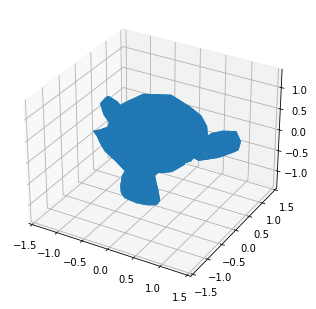

In [7]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot

# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure, auto_add_to_figure=False)
figure.add_axes(axes)

# Load the STL files and add the vectors to the plot
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(obj.vectors))

# Auto scale to the obj size
scale = obj.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()


In [8]:
# slice the mesh
import scipy
import trimesh

# ref: https://programtalk.com/vs2/python/8446/trimesh/trimesh/voxel.py/

resolution = 0.1

obj = trimesh.load_mesh(obj_path)
print(obj.euler_number)
# assert(obj.is_watertight) # you cannot build a solid if your volume is not tight
volume = obj.voxelized(pitch=resolution)
mat = volume.matrix # matrix of boolean


print(mat.shape)

0
(29, 19, 21)


In [9]:
# The voxel coordinates
volume.points

array([[-0.1,  0.2,  1. ],
       [-0.3,  0.1,  1. ],
       [-0.2,  0.1,  1. ],
       ...,
       [ 0. ,  0.2,  1. ],
       [ 0.1,  0.2,  1. ],
       [ 0. ,  0.3,  1. ]])

In [10]:
volume.points.shape

(1561, 3)

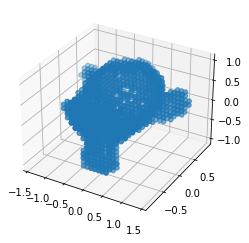

In [11]:
# Let's plot the voxelized mesh
figure = pyplot.figure()
# axes = mplot3d.Axes3D(figure, auto_add_to_figure=False)

axes = figure.add_subplot(111, projection='3d')
axes.scatter(volume.points[:,0], volume.points[:,1], volume.points[:,2])

# I could also plot voxels by using
# https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_euler_number.html


/tmp/ipykernel_395246/2146899893.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = mplot3d.Axes3D(figure)


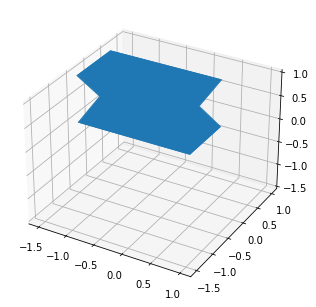

In [12]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot

# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot
meta = mesh.Mesh.from_file(meta_path)

copy = mesh.Mesh(meta.data.copy())
copy.translate([-1, 0, 0])

combined = mesh.Mesh(numpy.concatenate([meta.data] + [copy.data]))

axes.add_collection3d(mplot3d.art3d.Poly3DCollection(combined.vectors))

# Auto scale to the mesh size
scale = combined.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

    
def show_stl(mesh: mesh.Mesh):
    figure = pyplot.figure()
    axes = mplot3d.Axes3D(figure, auto_add_to_figure=False)
    figure.add_axes(axes)
    axes.add_collection3d(mplot3d.art3d.Poly3DCollection(mesh.vectors))
    # Auto-scale plot to mesh scale
    scale = combined.points.flatten()
    axes.auto_scale_xyz(scale, scale, scale)   
    pyplot.show() 


In [16]:
# We now need to put the meta.stl structure inside all these voxels
import stl
from stl import mesh
from combine import find_mins_maxs, copy_obj

meta = mesh.Mesh.from_file(meta_path)
# We need to scale the metastrucure to the pitch
ratio = resolution/(meta.x.max() - meta.x.min())
meta.points *= ratio
print(meta.points) 
# print(ratio)

[[-0.01660156 -0.0265625   0.053125   ... -0.025      -0.025
   0.05      ]
 [-0.01660156 -0.0265625   0.053125   ... -0.02324219 -0.0265625
   0.053125  ]
 [-0.01855469 -0.0296875   0.059375   ... -0.01660156 -0.0265625
   0.053125  ]
 ...
 [ 0.03903492  0.03654609  0.01745802 ...  0.03498639  0.03498639
   0.02555508]
 [ 0.03903492  0.03654609  0.01745802 ...  0.04308345  0.03765121
   0.00936096]
 [ 0.03903492  0.03654609  0.01745802 ...  0.03940297  0.02945186
   0.01672192]]


In [23]:
copies = []

for p in volume.points:
    copy = mesh.Mesh(meta.data.copy())
    copy.translate(p)
    copies.append(copy)

combined = mesh.Mesh( numpy.concatenate([copy.data for copy in copies]) )

# show_stl(combined)
combined.save('../data/combined.stl', mode=stl.Mode.ASCII)  # save as ASCII
